In [24]:
# ライブラリのインポート
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV

In [25]:
# 住宅価格データセットのダウンロード
#boston = load_boston()
#X = boston.data
#y = boston.target
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = np.ravel(raw_df.values[1::2, 2])

# 特徴量と正解を訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_trainの形状：',X_train.shape,' y_trainの形状：',y_train.shape,' X_testの形状：',X_test.shape,' y_testの形状：',y_test.shape)

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\treme\AppData\Local\Temp\ipykernel_18424\4090491023.py:7: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


X_trainの形状： (404, 13)  y_trainの形状： (404,)  X_testの形状： (102, 13)  y_testの形状： (102,)


In [26]:
# 特徴量の標準化
sc = StandardScaler()
# 訓練データを変換器で標準化
X_train_std = sc.fit_transform(X_train)
# テストデータを作成した変換器で標準化
X_test_std = sc.transform(X_test)

In [27]:
# グリッドサーチの実行
param_grid = [
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0], 
         'epsilon': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]
        }
    ]

model = SVR()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train_std, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'epsilon': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [28]:
-(grid_search.best_score_)

10.416077955288502

In [29]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'C': 300.0, 'epsilon': 1.0, 'gamma': 0.03, 'kernel': 'rbf'}
SVR(C=300.0, epsilon=1.0, gamma=0.03)


In [30]:
# グリッドサーチの最良モデルで予測
model_grs = grid_search.best_estimator_
y_train_grs_pred = model_grs.predict(X_train_std)
y_test_grs_pred = model_grs.predict(X_test_std)

# MSEの計算
print('MSE train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_grs_pred),
        mean_squared_error(y_test, y_test_grs_pred)))

MSE train: 3.13, test: 18.10


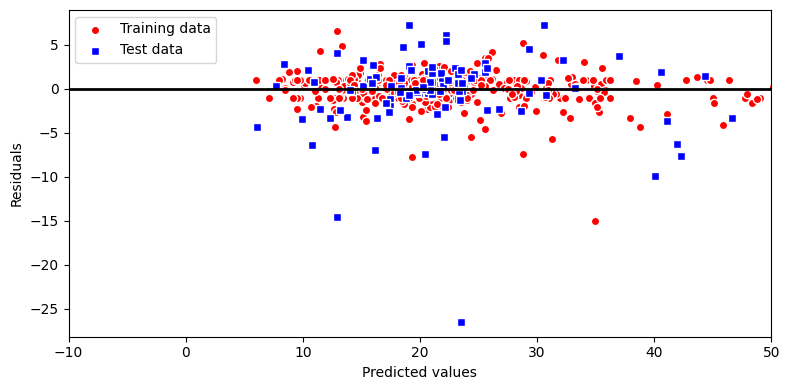

In [31]:
# 残差プロット
plt.figure(figsize=(8,4)) #プロットのサイズ指定

plt.scatter(y_train_grs_pred,  y_train_grs_pred - y_train,
            c='red', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_grs_pred,  y_test_grs_pred - y_test,
            c='blue', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()